In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from pandas_datareader import data as pdr
# import fix_yahoo_finance as yf

In [2]:
df = pdr.get_data_yahoo('SPY','2012-01-01','2017-01-01')

In [3]:
df = df.dropna()
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,128.380005,127.430000,127.760002,127.500000,193697900.0,108.037117
2012-01-04,127.809998,126.709999,127.199997,127.699997,127186500.0,108.206604
2012-01-05,128.229996,126.430000,127.010002,128.039993,173895000.0,108.494698
2012-01-06,128.220001,127.290001,128.199997,127.709999,148050000.0,108.215065
2012-01-09,128.179993,127.410004,128.000000,128.020004,99530200.0,108.477776


In [4]:
tmp_df = df[['Open','High','Low','Close']].copy()
tmp_df.head()

,Open,High,Low,Close
Date,,,,
2012-01-03,127.760002,128.380005,127.430000,127.500000
2012-01-04,127.199997,127.809998,126.709999,127.699997
2012-01-05,127.010002,128.229996,126.430000,128.039993
2012-01-06,128.199997,128.220001,127.290001,127.709999
2012-01-09,128.000000,128.179993,127.410004,128.020004


### 피처 데이터 및 레이블 데이터 생성

In [5]:
tmp_df['Open-Close'] = tmp_df['Open'] - tmp_df['Close']
tmp_df['High-Low'] = tmp_df['High'] - tmp_df['Low']
tmp_df = tmp_df.dropna()
X = tmp_df[['Open-Close','High-Low']]
Y = np.where(tmp_df['Close'].shift(-1) > tmp_df['Close'], 1, -1)

### 학습데이터 테스트데이터 분리

In [6]:
split_percentage = 0.7
split = int(split_percentage* len(tmp_df))
X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

### KNN Model 학습

In [7]:
knn = KNeighborsClassifier(n_neighbors = 15)

knn.fit(X_train,Y_train)

accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print('Train_data Accuracy : %.2f' % accuracy_train)
print('Test_data Accuracy : %.2f' % accuracy_test)

Train_data Accuracy : 0.60
Test_data Accuracy : 0.53


### KNN 모델을 활용한 간단한 투자전략 만들기
* KNN 모델
    -  1 이라고 예측하면 매수 
    - -1 이라고 예측하면 공매도


C:\Users\HIT-2233\Anaconda3\envs\py36\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


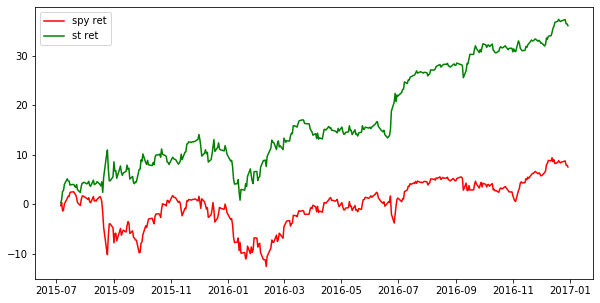

In [8]:
tmp_df['Predicted_Signal'] = knn.predict(X)

tmp_df['SPY_ret'] = np.log(tmp_df['Close'] / tmp_df['Close'].shift(1))
cum_spy_ret = tmp_df[split:]['SPY_ret'].cumsum() * 100

tmp_df['st_ret'] = tmp_df['SPY_ret'] * tmp_df['Predicted_Signal'].shift(1)
cum_st_ret = tmp_df[split:]['st_ret'].cumsum() * 100

plt.figure(figsize=(10,5))
plt.plot(cum_spy_ret, color='r',label='spy ret')
plt.plot(cum_st_ret , color='g', label='st ret')
plt.legend()
plt.show()

In [9]:
print('TOTAL : ',tmp_df['Predicted_Signal'].count())
print('UP predict : ',tmp_df.loc[tmp_df['Predicted_Signal'] == 1,['Predicted_Signal']].count()[0])
print('DOWN predict : ',tmp_df.loc[tmp_df['Predicted_Signal'] == -1,['Predicted_Signal']].count()[0])

TOTAL :  1258
UP predict :  883
DOWN predict :  375


### 샤프지수

In [10]:
std = cum_st_ret.std()
sharpe = (cum_st_ret - cum_spy_ret) / std
sharpe = sharpe.mean()
print('Sharpe ratio : %.2f' % sharpe)

Sharpe ratio : 1.63


* https://blog.quantinsti.com/machine-learning-k-nearest-neighbors-knn-algorithm-python/ 참고

In [11]:
cum_spy_ret

Date
2015-07-06   -0.285002
2015-07-07    0.341900
2015-07-08   -1.350059
2015-07-09   -1.169322
2015-07-10    0.081968
                ...   
2016-12-23    8.503577
2016-12-27    8.751375
2016-12-28    7.921490
2016-12-29    7.899211
2016-12-30    7.533038
Name: SPY_ret, Length: 378, dtype: float64